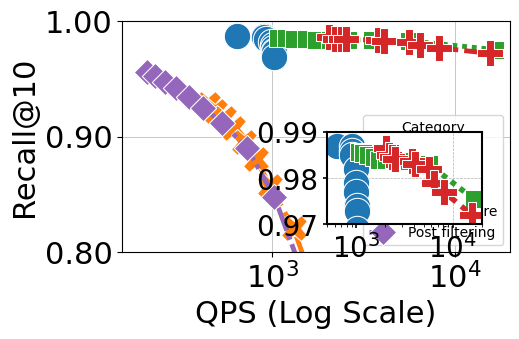

In [8]:
#Trip Click
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Set a larger default font size for all plot elements
# This helps make everything more readable initially
# plt.rcParams.update({'font.size': 14}) # Optional: set a global default

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            # Calculate QPS (Queries Per Second) as 1 / Time (assuming Time is in seconds per query)
            # Time here seems to be total time, so we'll use a placeholder variable as QPS is better for a log scale.
            # Assuming 'Time' is actually latency (ms) and converting to QPS (1000/Time) for the log scale label.
            # For now, let's keep 'Time' on the axis as per your original code, but use a larger font for the label.
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Data (kept the same)
schemes = {
    "Milvus": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1018.3, 1015.9, 1014.3, 1011.1, 1010.5, 988.2, 919.0, 903.5, 899.8, 635.9],
        "Recall": [0.969, 0.973, 0.974, 0.977, 0.979, 0.982, 0.985, 0.986, 0.987, 0.987]
    },
    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [4803, 1898.05, 1305.79, 976.261, 811.796, 698.071, 605.344, 543.929, 487.062, 443.271],
        "Recall": [0.5010, 0.7480, 0.8208, 0.8572, 0.8803, 0.8958, 0.9074, 0.9161, 0.9225, 0.9281]
    },
    "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [16704.7, 5626.37, 3506.85, 2600.3, 2059.95, 1733.83, 1519.29, 1320.1, 1191.67, 1069.68],
        "Recall": [0.9754, 0.9831, 0.9837, 0.9838, 0.9839, 0.9840, 0.9845, 0.9850, 0.9855, 0.9857] 
    },
    "Query-aware":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [15675, 8155, 6463, 5635, 4109, 3792, 2533, 2366, 2197, 2053],
        "Recall": [0.9721, 0.977, 0.979, 0.982, 0.983, 0.9838, 0.9842, 0.9846, 0.9850, 0.9865]
    },
    "Post filtering": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [2783, 1026, 724, 529, 415, 347, 295, 257, 228, 204],
        "Recall": [0.6608, 0.8480, 0.8906, 0.9123, 0.9252, 0.9348, 0.9422, 0.9478, 0.9524, 0.9561]
    }
}

df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(5, 3)) 

# Set preferred font sizes
LABEL_FONTSIZE = 22
TICK_FONTSIZE = 22
LEGEND_FONTSIZE =14
LINE_WIDTH = 3.5
MARKER_SIZE = 19

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.8, 1.0)
ax.set_xlim(150, 2e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.97, 0.99)
axins.set_xlim(500, 2e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/TripClickPoint.pdf", format="pdf", bbox_inches="tight")

plt.show()

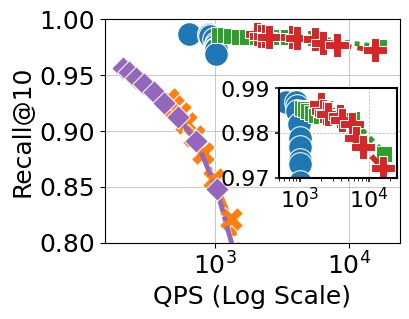

In [42]:
# Trip Click Plot without legend
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Data
schemes = {
    "Milvus": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1018.3, 1015.9, 1014.3, 1011.1, 1010.5, 988.2, 919.0, 903.5, 899.8, 635.9],
        "Recall": [0.969, 0.973, 0.974, 0.977, 0.979, 0.982, 0.985, 0.986, 0.987, 0.987]
    },
    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [4803, 1898.05, 1305.79, 976.261, 811.796, 698.071, 605.344, 543.929, 487.062, 443.271],
        "Recall": [0.5010, 0.7480, 0.8208, 0.8572, 0.8803, 0.8958, 0.9074, 0.9161, 0.9225, 0.9281]
    },
    "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [16704.7, 5626.37, 3506.85, 2600.3, 2059.95, 1733.83, 1519.29, 1320.1, 1191.67, 1069.68],
        "Recall": [0.9754, 0.9831, 0.9837, 0.9838, 0.9839, 0.9840, 0.9845, 0.9850, 0.9855, 0.9857]
    },
    "Query-aware": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [15675, 8155, 6463, 5635, 4109, 3792, 2533, 2366, 2197, 2053],
        "Recall": [0.9721, 0.977, 0.979, 0.982, 0.983, 0.9838, 0.9842, 0.9846, 0.9850, 0.9865]
    },
    "Post filtering": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [2783, 1026, 724, 529, 415, 347, 295, 257, 228, 204],
        "Recall": [0.6608, 0.8480, 0.8906, 0.9123, 0.9252, 0.9348, 0.9422, 0.9478, 0.9524, 0.9561]
    }
}

df = flatten_schemes(schemes)

# --- Main plot ---
fig, ax = plt.subplots(figsize=(3.8, 2.9)) 

LABEL_FONTSIZE = 18
TICK_FONTSIZE = 18
LINE_WIDTH = 3.5
MARKER_SIZE = 17

# Plot without legend
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax,
    legend=False
)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.8, 1.0)
ax.set_xlim(150, 2.4e4)

ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7)

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.59, 0.29, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.97, 0.99)
axins.set_xlim(500, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.1, length=3)
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

axins.set_xlabel('')
axins.set_ylabel('')

# Add border around inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# --- Save figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/TripClickPoint.pdf", format="pdf", bbox_inches="tight")
plt.show()


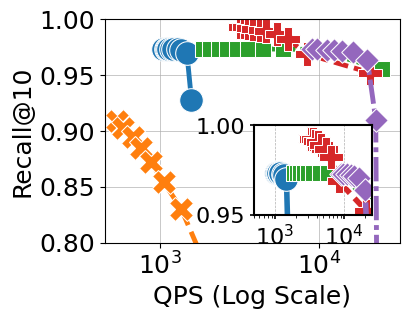

In [48]:
#Sift 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Milvus": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1573.84, 1471.59, 1348.19, 1297.04, 1196.76, 1171.55, 1124.75, 1106.69, 1083.48, 1043.29],
        "Recall": [0.9275, 0.9699, 0.9724, 0.9729, 0.9731, 0.9732, 0.9732, 0.9733, 0.9733, 0.9733]
    },

    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [6688.96, 2816.9, 1816.2, 1358.33, 1050.64, 875.58, 752.445, 678.518, 585.789, 538.793],
        "Recall": [0.4415, 0.7054, 0.7881, 0.8299, 0.8543, 0.8718, 0.8845, 0.8944, 0.9022, 0.9085]
    },

   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [24937.7, 9523.81, 5934.72, 4440.5, 3586.8, 3022.97, 2626.74, 2329.92, 2069.54, 1862.89],
        "Recall": [0.9552, 0.9728, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733] 
    },

     "Query-aware":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [20921, 8328, 6378, 5435, 4661, 4252, 3811, 3574, 3350, 3188],
        "Recall": [0.9521, 0.9688, 0.9821, 0.9867, 0.9892, 0.9906, 0.9915, 0.9922, 0.9926, 0.9929]
    },
    "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [23980, 23309, 22675, 20080, 16393, 13966, 12363, 11173, 9756, 8960],
        "Recall": [0.1641, 0.6422, 0.9101, 0.9636, 0.9704, 0.9717, 0.9723, 0.9727, 0.9729, 0.9730]
    }
}

df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(3.8, 2.9)) 

LABEL_FONTSIZE = 18
TICK_FONTSIZE = 18
LINE_WIDTH = 3.5
MARKER_SIZE = 17

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.8, 1.0)
ax.set_xlim(450, 3.2e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.95, 1)
axins.set_xlim(500, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/SIFT.pdf", format="pdf", bbox_inches="tight")

plt.show()


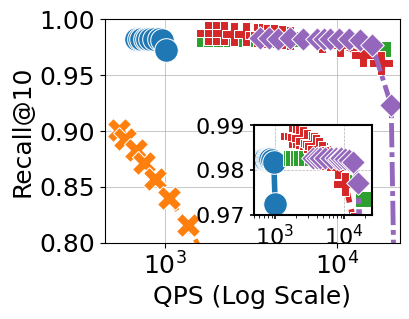

In [49]:
#PAPER

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Milvus": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1011.7, 967.7, 919.9, 860.8, 816.9, 788.2, 764.5, 732.3, 705.6, 680.9],
        "Recall": [0.9723, 0.9817, 0.9822, 0.9824, 0.9824, 0.9825, 0.9825, 0.9825, 0.9825, 0.9825]
    },

    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [6688.96, 2816.9, 1816.2, 1358.33, 1050.64, 875.58, 752.445, 678.518, 585.789, 538.793],
        "Recall": [0.4802, 0.7085, 0.7784, 0.8156, 0.8398, 0.8572, 0.8709, 0.8827, 0.8929, 0.9004]
    },

   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [18421.5, 8818.34, 5760.37, 4215.85, 3417.63, 2809.78, 2422.48, 2131.29, 1843.32, 1694.63],
        "Recall": [0.9735, 0.9819, 0.9824, 0.9825, 0.9826, 0.9827, 0.9827, 0.9827, 0.9827, 0.9827] 
    },

     "Query-aware":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [18055, 14030, 10423, 8124, 5333, 4759, 4310, 3922, 3668, 3412, 2942, 2513, 2209, 1988, 1786],
        "Recall": [0.9606, 0.9680, 0.9769, 0.9807, 0.9828, 0.9839, 0.9847, 0.9854, 0.9858, 0.9860, 0.9865, 0.9872, 0.9874, 0.9876, 0.9877]
    },
    "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [24814, 25380, 20576, 15924, 13587, 11696, 10204, 9115, 8380, 7671, 6356, 5315, 4530, 4016, 3563],
        "Recall": [0.1643, 0.6457, 0.9230, 0.9771, 0.9818, 0.9823, 0.9825, 0.9826, 0.9825, 0.9826, 0.9827, 0.9828, 0.9827, 0.9828, 0.9828]
    }
}

df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(3.8, 2.9)) 

LABEL_FONTSIZE = 18
TICK_FONTSIZE = 18
LINE_WIDTH = 3.5
MARKER_SIZE = 17

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.8, 1.0)
ax.set_xlim(450, 2.3e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.97, 0.99)
axins.set_xlim(500, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/Paper.pdf", format="pdf", bbox_inches="tight")

plt.show()



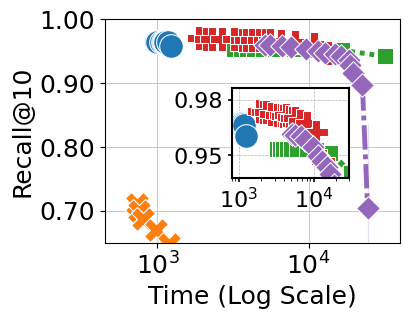

In [6]:

#BIER

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Milvus ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1226.5, 1181.1,  1127.8, 1127.1, 1098.6, 1098.6, 1086.6, 1053.6, 996.7, 977.7],
        "Recall": [0.9586, 0.9638, 0.9641, 0.9643, 0.9644, 0.9644, 0.9644, 0.9644, 0.9644, 0.9645]
    },

    "ACORN-1 ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [6172.84, 3311.26, 2060.44, 1632.21, 1327.43, 1184.83, 981.033, 797.024, 752.257, 727.802],
        "Recall": [0.229, 0.4369, 0.5274, 0.5853, 0.6227, 0.6482, 0.6697, 0.6865, 0.6987, 0.7101]
    },

   "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [31914.9, 16666.7, 10563.4, 8064.52, 6000, 5000, 4373.18, 3886.01, 3562.95, 3191.49],
        "Recall": [0.942, 0.9512, 0.9525, 0.9527, 0.9529, 0.9529, 0.9529, 0.9529, 0.953, 0.953] 
    },

     "Query-aware ":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [13494, 10870, 8152, 6617, 5535, 5119, 4702, 4225, 3846, 3614, 3191, 2655, 2308, 2087, 1883],
        "Recall": [0.9475, 0.9607, 0.9645, 0.9655, 0.9668, 0.9669, 0.9672, 0.9679, 0.9676, 0.9681, 0.9683, 0.9686, 0.9694, 0.9695, 0.9701]
    },
    "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [ 24590, 24590, 22727, 19737, 18750,18519, 16304, 15000, 12931, 11538, 9677, 7653, 6696, 5576, 5119],
        "Recall": [0.5733, 0.8353, 0.8963, 0.9163, 0.9287, 0.9367, 0.9416, 0.945, 0.9477, 0.9499, 0.9537, 0.9571, 0.9585, 0.9593, 0.9597]
    }
}

df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(3.8, 2.9)) 

LABEL_FONTSIZE = 18
TICK_FONTSIZE = 18
LINE_WIDTH = 3.5
MARKER_SIZE = 17
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("Time (Log Scale)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.65, 1.0)
ax.set_xlim(450, 4e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
# axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

axins = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.43, 0.29, 1, 1), 
                   bbox_transform=ax.transAxes,
                   loc='lower left', borderpad=0)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.94, 0.98)
axins.set_xlim(800, 3e4)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/BIER.pdf", format="pdf", bbox_inches="tight")

plt.show()




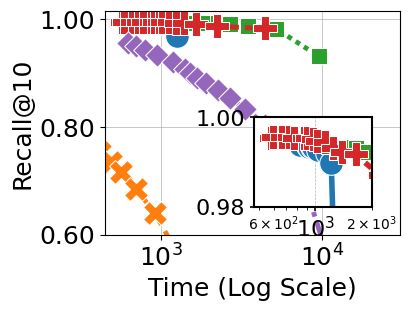

In [7]:

#YOUTUBE CATEGORY

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Milvus": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1257.7, 1215.9, 1148.4, 1031.1, 970.7, 958.7, 919.3, 910.2, 832.4, 827.0],
        "Recall": [0.9693, 0.9897, 0.992, 0.9928, 0.9934, 0.9934, 0.9934, 0.9936, 0.9938, 0.9938]
    },

    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [3213.3, 1283.19, 915.549, 700.483, 568.071, 487.19, 419.227, 352.691, 324.203, 304.622],
        "Recall": [0.3329, 0.5604, 0.6403, 0.684, 0.7155, 0.7354, 0.7528, 0.7676, 0.7798, 0.7915]
    },

   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [9508.2, 5178.57, 3473.05, 2691.42, 2239.38, 1847.13, 1654.78, 1407.77, 1290.32, 1192.19],
        "Recall": [0.931, 0.9822, 0.9878, 0.9913, 0.9922, 0.9922, 0.9931, 0.9934, 0.9935, 0.9937] 
    },

     "Query-aware":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [4377, 2214, 1641, 1391, 1237, 1126, 1019, 969, 906, 870, 771, 720, 660, 591, 577],
        "Recall": [0.983, 0.987, 0.9917, 0.9923, 0.9931, 0.9945, 0.9947, 0.9951, 0.9953, 0.9953, 0.9955, 0.9956, 0.9956, 0.9956, 0.9954]
    },
    "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        
        "Time": [ 12083, 6864, 4414, 3333, 2661, 2257, 1896, 1674, 1510, 1406, 1186, 946, 797, 695, 628],
        "Recall": [0.5114, 0.7433, 0.8043, 0.8334, 0.854, 0.8678, 0.8816, 0.8903, 0.9003, 0.9069, 0.9198, 0.9345, 0.9436, 0.9504, 0.9564]
    }
}


df = flatten_schemes(schemes)

# --- Main plot ---
# Increase figure size slightly for better spacing
fig, ax = plt.subplots(figsize=(3.8, 2.9)) 

LABEL_FONTSIZE = 18
TICK_FONTSIZE = 18
LINE_WIDTH = 3.5
MARKER_SIZE = 17

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False  # Increased line/marker size
)

ax.set_xscale("log")
# Increase label font size
ax.set_xlabel("Time (Log Scale)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.6, 1.015)
ax.set_xlim(450, 3e4)

# Increase tick label font size
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Increase legend font size
#ax.legend(loc="lower left", fontsize=LEGEND_FONTSIZE, title_fontsize=LEGEND_FONTSIZE + 1, frameon=True)

# Add a strong grid
ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_ylim(0.98, 1)
axins.set_xlim(470, 2e3)
axins.grid(True, linestyle="--", linewidth=0.5)

# Increase inset tick label size
axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove default labels which clutter the inset
axins.set_xlabel('') 
axins.set_ylabel('')

# Add a border around the inset
for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.savefig("/data3/Adeel/Query-AwareResult/YoutubeCategory.pdf", format="pdf", bbox_inches="tight")

plt.show()








NameError: name 'axins' is not defined

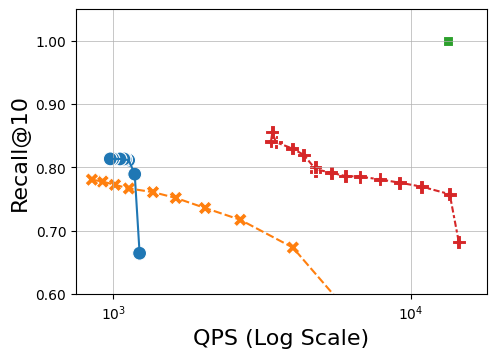

In [1]:
# paper corelation 10
#PAPER  Coorelation 10

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1226.5, 1181.1,  1127.8, 1127.1, 1098.6, 1098.6, 1086.6, 1053.6, 996.7, 977.7],
        "Recall": [0.6646, 0.7895, 0.8115, 0.8115, 0.8125, 0.8125, 0.8135, 0.8135, 0.8136, 0.8136]
    },

    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [8403.36, 4016.06, 2673.8, 2036.66, 1623.38, 1360.54, 1128.67, 1014.2, 920.81, 848.176],
        "Recall": [0.4989, 0.6735, 0.7174, 0.736, 0.7519, 0.7611, 0.7669, 0.7726, 0.7778, 0.7808]
    },

    "Pre filtering":  {
        "Value": [20],
        "Time": [ 13333.33],
        "Recall": [1]
    },
    "Query-aware ":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [14492.75,13513.51, 10869.57, 9174.31, 7874.02, 6756.76, 6024.10, 5405.41, 4784.69, 4784.69, 4366.81, 4000.00, 3521.13, 3389.83, 3424.66],
        "Recall": [0.6826, 0.7578, 0.7698, 0.776, 0.7812, 0.7856, 0.7865, 0.7917, 0.7936, 0.801, 0.82, 0.83, 0.84, 0.841, 0.856]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.60, 1.05)
ax.set_xlim(750, 1.8e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
# axins = inset_axes(ax, width="40%", height="45%", loc='upper left', borderpad=2)
# sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
# sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

# axins.set_xscale("log")
# axins.set_ylim(0.65, 0.88)
# axins.set_xlim(800, 2.5e4)
# axins.grid(True, linestyle="--", linewidth=0.5)
# axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()


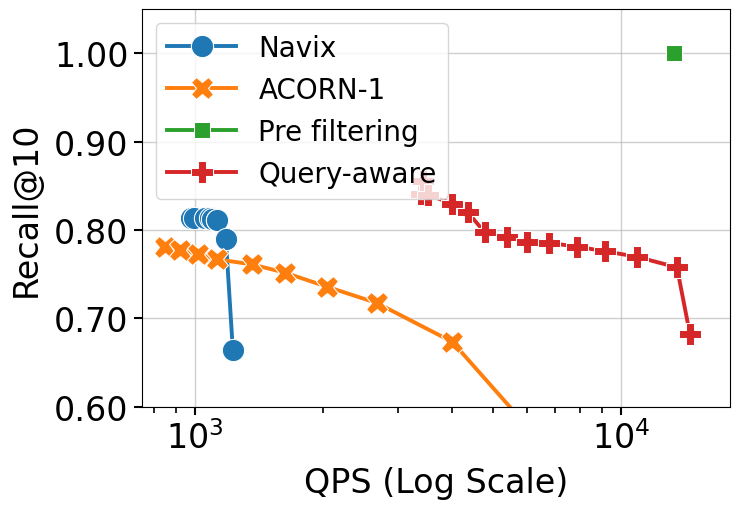

In [27]:
# PAPER Correlation 10 (Improved for consistency with TripClick plots)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterMathtext

# --- Data Flattening ---
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# --- Data ---
schemes = {
   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [1226.5, 1181.1, 1127.8, 1127.1, 1098.6, 1098.6, 1086.6, 1053.6, 996.7, 977.7],
        "Recall": [0.6646, 0.7895, 0.8115, 0.8115, 0.8125, 0.8125, 0.8135, 0.8135, 0.8136, 0.8136]
    },
    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [8403.36, 4016.06, 2673.8, 2036.66, 1623.38, 1360.54, 1128.67, 1014.2, 920.81, 848.176],
        "Recall": [0.4989, 0.6735, 0.7174, 0.736, 0.7519, 0.7611, 0.7669, 0.7726, 0.7778, 0.7808]
    },
    "Pre filtering": {
        "Value": [20],
        "Time": [13333.33],
        "Recall": [1]
    },
    "Query-aware": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [14492.75, 13513.51, 10869.57, 9174.31, 7874.02, 6756.76, 6024.10, 5405.41, 4784.69, 
                 4784.69, 4366.81, 4000.00, 3521.13, 3389.83, 3424.66],
        "Recall": [0.6826, 0.7578, 0.7698, 0.776, 0.7812, 0.7856, 0.7865, 0.7917, 0.7936, 
                   0.801, 0.82, 0.83, 0.84, 0.841, 0.856]
    }
}

df = flatten_schemes(schemes)

# --- Styling (matching TripClick figure) ---
LABEL_FONTSIZE = 24
TICK_FONTSIZE = 24
LEGEND_FONTSIZE = 20
LINE_WIDTH = 2.8
MARKER_SIZE = 16

# --- Figure ---
fig, ax = plt.subplots(figsize=(7.5, 5.2))

# --- Lineplot + Scatter for markers ---
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    linewidth=LINE_WIDTH, markers=True, markersize=MARKER_SIZE, dashes=False, ax=ax
)

# --- Axes Formatting ---
ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylim(0.60, 1.05)
ax.set_xlim(750, 1.8e4)
ax.grid(True, which='major', linestyle="-", linewidth=1.0, alpha=0.6)

# --- Ticks ---
ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE, width=1.5, length=6)
ax.tick_params(axis='both', which='minor', width=1.2, length=4)
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# --- Legend (same style as upper plot) ---
ax.legend(
    loc="upper left",
    fontsize=LEGEND_FONTSIZE,
    title_fontsize=LEGEND_FONTSIZE + 1,
    frameon=True,
    handlelength=2.5,
    handletextpad=0.8
)

# --- Save or show ---
plt.tight_layout()
plt.savefig("/data3/Adeel/Query-AwareResult/Correlation10.pdf", format="pdf", bbox_inches="tight", dpi=600)
plt.show()


/tmp/ipykernel_83636/2037806595.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


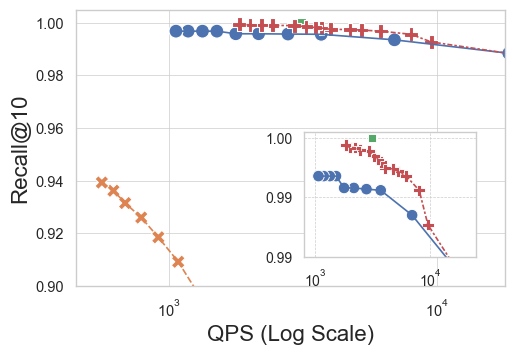

In [53]:
#Co relation 100
#PAPER  Coorelation 10

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [18518.5, 6944.44, 3703.7, 2785.52, 2164.5, 1779.36, 1512.86, 1336.9, 1182.03, 1064.96],
        "Recall": [0.9884, 0.9935, 0.9956, 0.9957, 0.9958, 0.9958, 0.9968, 0.9968, 0.9968, 0.9968]
    },

    "ACORN-1 ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [4184.1, 2450.98, 1808.32, 1335.11, 1085.78, 915.751, 790.514, 688.705, 622.665, 563.698],
        "Recall": [0.5931, 0.8197, 0.8718, 0.8946, 0.9092, 0.9185, 0.926, 0.9315, 0.9362, 0.9393]
    },


     
    "Pre filtering":  {
        "Value": [20],
        "Time": [ 3105.59],
        "Recall": [1]
    },
    "Query-aware ":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [55555.6, 9523.81, 8000.0, 6172.84, 5235.60, 4739.34, 4016.06, 3703.70, 3521.13, 3246.75, 2941.18, 2439.02, 2217.29, 2012.08, 1834.86],
        "Recall": [0.9811, 0.9927, 0.9956, 0.9968, 0.9972, 0.9974, 0.9975, 0.9980, 0.9982, 0.9985, 0.9989, 0.9990, 0.9992, 0.9992, 0.9994]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.90, 1.005)
ax.set_xlim(450, 1.8e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="45%", loc='lower right', borderpad=2)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.99,1.0005)
axins.set_xlim(800, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()


/tmp/ipykernel_88687/3218965998.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


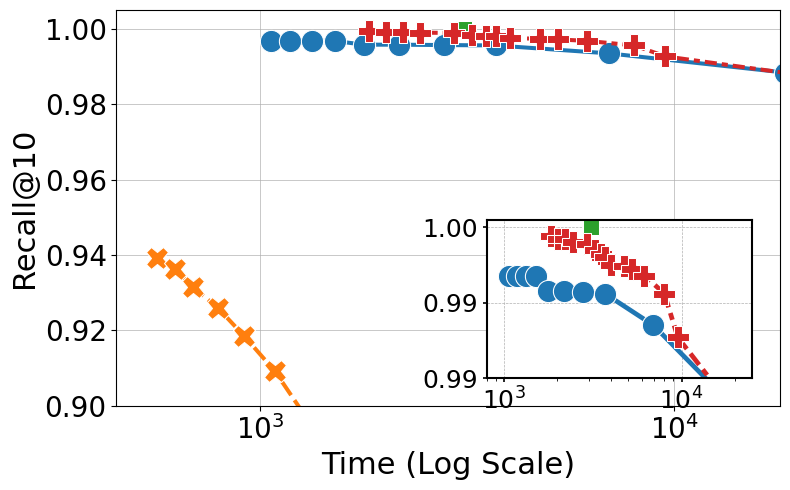

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterMathtext
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- Flatten Data ---
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category.strip(), "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# --- Data ---
schemes = {
   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [18518.5, 6944.44, 3703.7, 2785.52, 2164.5, 1779.36, 1512.86, 1336.9, 1182.03, 1064.96],
        "Recall": [0.9884, 0.9935, 0.9956, 0.9957, 0.9958, 0.9958, 0.9968, 0.9968, 0.9968, 0.9968]
    },
    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [4184.1, 2450.98, 1808.32, 1335.11, 1085.78, 915.751, 790.514, 688.705, 622.665, 563.698],
        "Recall": [0.5931, 0.8197, 0.8718, 0.8946, 0.9092, 0.9185, 0.926, 0.9315, 0.9362, 0.9393]
    },
    "Pre filtering": {
        "Value": [20],
        "Time": [3105.59],
        "Recall": [1]
    },
    "Query-aware": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [55555.6, 9523.81, 8000.0, 6172.84, 5235.60, 4739.34, 4016.06, 3703.70, 3521.13,
                 3246.75, 2941.18, 2439.02, 2217.29, 2012.08, 1834.86],
        "Recall": [0.9811, 0.9927, 0.9956, 0.9968, 0.9972, 0.9974, 0.9975, 0.9980, 0.9982,
                   0.9985, 0.9989, 0.9990, 0.9992, 0.9992, 0.9994]
    }
}

df = flatten_schemes(schemes)

# --- Create Figure & Axes ---
fig, ax = plt.subplots(figsize=(7.5, 5.2))

# --- Set preferred font sizes ---
LABEL_FONTSIZE = 22
TICK_FONTSIZE = 20
LINE_WIDTH = 2.9
MARKER_SIZE = 16

# --- Main line plot ---
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True, 
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE, ax=ax, legend=False
)
# Ensure no legend
if ax.get_legend() is not None:
    ax.get_legend().remove()

ax.set_xscale("log")
ax.set_xlabel("Time (Log Scale)", fontsize=LABEL_FONTSIZE) 
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.90, 1.005)
ax.set_xlim(450, 1.8e4)

ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE) 
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

ax.grid(True, which='major', linestyle="-", linewidth=0.7, alpha=0.7) 

# --- Inset (zoomed) ---
axins = inset_axes(ax, width="40%", height="40%", loc='lower right', borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.5, markersize=MARKER_SIZE, ax=axins, legend=False
)
# Ensure inset has no legend
if axins.get_legend() is not None:
    axins.get_legend().remove()

axins.set_xscale("log")
axins.set_ylim(0.99, 1.0005)
axins.set_xlim(800, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.5)

axins.tick_params(labelsize=TICK_FONTSIZE - 2, width=1.2, length=3) 
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

axins.set_xlabel('') 
axins.set_ylabel('')

for spine in axins.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
    
# --- Save Figure ---
plt.tight_layout()
plt.savefig("/data3/Adeel/Query-AwareResult/Corelation100.pdf", format="pdf", bbox_inches="tight")
plt.show()


/tmp/ipykernel_83636/3106912548.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


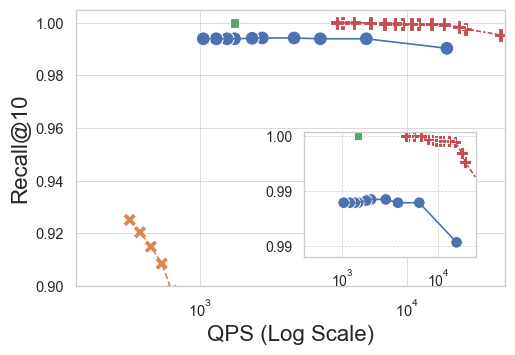

In [54]:
#paper corelation 200
#PAPER  Coorelation 10

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [15625, 6369.43, 3816.79, 2849, 2000, 1785.71, 1468.43, 1351.35, 1197.6, 1036.27],
        "Recall": [0.9903, 0.9939, 0.9939, 0.9942, 0.9942, 0.9941, 0.9939, 0.9939, 0.9939, 0.9939]
    },

    "ACORN-1 ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [4310.34, 1766.78, 1430.62, 1041.67, 874.126, 729.927, 652.742, 578.369, 512.295, 456.621],
        "Recall": [.5043, 0.7517, 0.8294, 0.8672, 0.8872, 0.8982, 0.9085, 0.9149, 0.9204, 0.9251]
    },


     
    "Pre filtering":  {
        "Value": [20],
        "Time": [ 1468.4],
        "Recall": [1]
    },
    "Query-aware ":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [37037.04, 28474.58, 19230.77, 17857.14, 15151.52, 13157.89, 11363.64, 10526.32, 9523.81, 8771.93, 7812.5, 6666.67, 5555.56, 4901.96, 4587.16],
        "Recall": [0.9950,0.9954, 0.9976, 0.9984, 0.9994, 0.9995, 0.9995, 0.9995, 0.9995, 0.9996, 0.99964, 0.99996, 0.99997, 0.99998, 0.99998]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.90, 1.005)
ax.set_xlim(250, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="45%", loc='lower right', borderpad=2)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.989,1.0003)
axins.set_xlim(400, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()


/tmp/ipykernel_88687/934905277.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


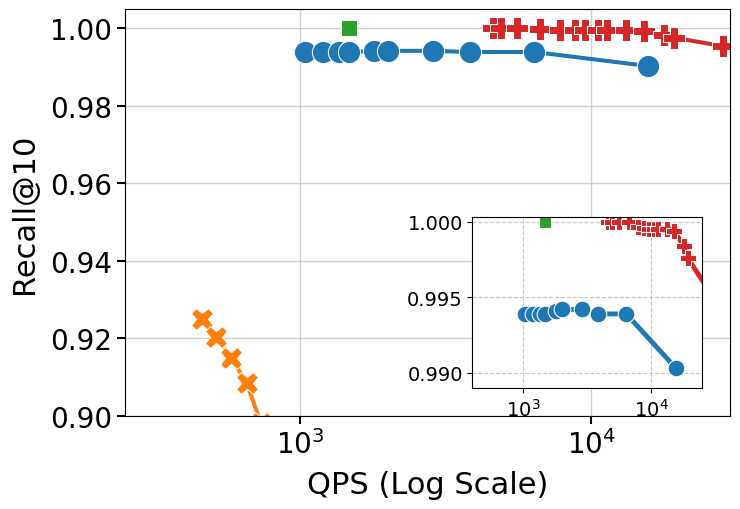

In [36]:
# PAPER Correlation 200 — No Legend + No Minor Ticks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterMathtext
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- Flatten Data ---
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category.strip(), "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# --- Data ---
schemes = {
   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [15625, 6369.43, 3816.79, 2849, 2000, 1785.71, 1468.43, 1351.35, 1197.6, 1036.27],
        "Recall": [0.9903, 0.9939, 0.9939, 0.9942, 0.9942, 0.9941, 0.9939, 0.9939, 0.9939, 0.9939]
    },
    "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [4310.34, 1766.78, 1430.62, 1041.67, 874.126, 729.927, 652.742, 578.369, 512.295, 456.621],
        "Recall": [0.5043, 0.7517, 0.8294, 0.8672, 0.8872, 0.8982, 0.9085, 0.9149, 0.9204, 0.9251]
    },
    "Pre filtering": {
        "Value": [20],
        "Time": [1468.4],
        "Recall": [1]
    },
    "Query-aware": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [37037.04, 28474.58, 19230.77, 17857.14, 15151.52, 13157.89, 11363.64, 10526.32, 9523.81,
                 8771.93, 7812.5, 6666.67, 5555.56, 4901.96, 4587.16],
        "Recall": [0.9950, 0.9954, 0.9976, 0.9984, 0.9994, 0.9995, 0.9995, 0.9995, 0.9995,
                   0.9996, 0.99964, 0.99996, 0.99997, 0.99998, 0.99998]
    }
}

df = flatten_schemes(schemes)

# --- Styling parameters ---
LABEL_FONTSIZE = 22
TICK_FONTSIZE = 20
LINE_WIDTH = 2.9
MARKER_SIZE = 16
palette = sns.color_palette("tab10", n_colors=4)

# --- Main Figure ---
fig, ax = plt.subplots(figsize=(7.5, 5.2))

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    linewidth=LINE_WIDTH, markers=True, markersize=MARKER_SIZE,
    dashes=False, ax=ax, palette=palette, legend=False
)

# --- Axes (Main Plot) ---
ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylim(0.90, 1.005)
ax.set_xlim(250, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=1.0, alpha=0.6)
ax.tick_params(axis='both', labelsize=TICK_FONTSIZE, width=1.5, length=6)
ax.minorticks_off()  # 🔹 disable minor ticks
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# --- Inset (Zoomed Region) ---
axins = inset_axes(ax, width="38%", height="42%", loc='lower right', borderpad=2)
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    linewidth=3.5, markers=True, markersize=12, dashes=False,
    ax=axins, legend=False, palette=palette
)

axins.set_xscale("log")
axins.set_ylim(0.989, 1.0003)
axins.set_xlim(400, 2.5e4)
axins.grid(True, linestyle="--", linewidth=0.8, alpha=0.7)
axins.tick_params(labelsize=14)
axins.minorticks_off()  # 🔹 disable minor ticks in inset
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.3f}'))
axins.set_xlabel('')
axins.set_ylabel('')

# --- Save or Show ---
plt.tight_layout()
plt.savefig("/data3/Adeel/Query-AwareResult/Corelation200.pdf",
            format="pdf", bbox_inches="tight", dpi=600)
plt.show()


/tmp/ipykernel_83636/548518810.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


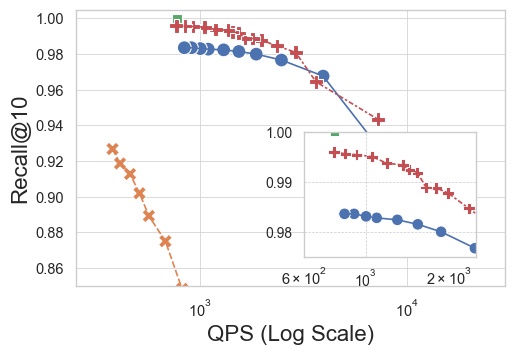

In [55]:
# corelation 1000
#PAPER  Coorelation 10

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [10638.3, 3937.01, 2475.25, 1869.16, 1540.83, 1300.39, 1095.29, 1003.01, 908.265, 838.926],
        "Recall": [0.9034, 0.9677, 0.9767, 0.98, 0.9815, 0.9824, 0.9828, 0.9831, 0.9836, 0.9836]
    },

    "ACORN-1 ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [3484.32, 1686.34, 1102.54, 818.331, 679.81, 565.611, 509.424, 458.505, 410.172, 377.358],
        "Recall": [0.485, 0.7393, 0.8098, 0.8484, 0.8751, 0.8893, 0.902, 0.9128, 0.9187, 0.9268]
    },


     
    "Pre filtering":  {
        "Value": [20],
        "Time": [ 771.8],
        "Recall": [1]
    },
    "Query-aware ":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [7241.38, 3636.36, 2898.55, 2352.94, 1980.20, 1795.70, 1650.17, 1536.10, 1432.66, 1362.97, 1189.78, 1053.74, 925.93, 844.59, 768.64],
        "Recall": [0.9435, 0.9645, 0.981, 0.9847, 0.9878, 0.9888, 0.9889, 0.9919, 0.9925, 0.9934, 0.9938, 0.9951, 0.9955, 0.9957, 0.9960]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.85, 1.005)
ax.set_xlim(250, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="45%", loc='lower right', borderpad=2)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.975,1)
axins.set_xlim(600, 2.5e3)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()


/tmp/ipykernel_88687/2394102971.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


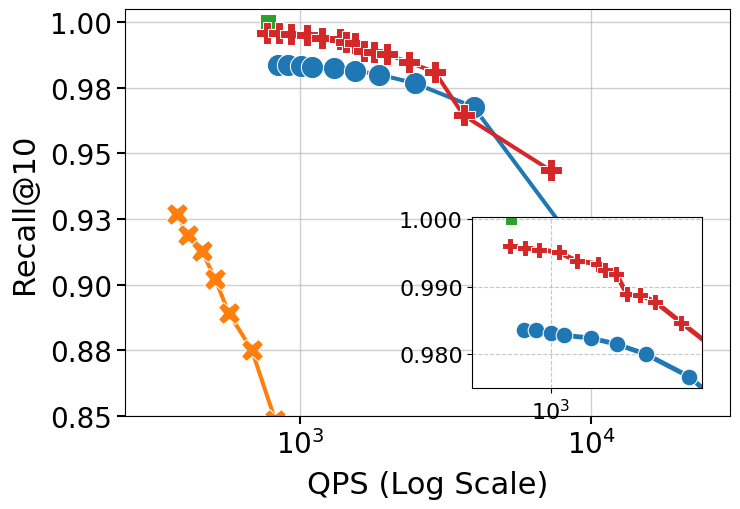

In [41]:
# PAPER Correlation 1000 — No Legend + No Minor Ticks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterMathtext
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- Flatten helper ---
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for v, t, r in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category.strip(), "Value": v, "Time": t, "Recall": r})
    return pd.DataFrame(rows)

# --- Data ---
schemes = {
   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [10638.3, 3937.01, 2475.25, 1869.16, 1540.83, 1300.39, 1095.29, 1003.01, 908.265, 838.926],
        "Recall": [0.9034, 0.9677, 0.9767, 0.98, 0.9815, 0.9824, 0.9828, 0.9831, 0.9836, 0.9836]
    },
   "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [3484.32, 1686.34, 1102.54, 818.331, 679.81, 565.611, 509.424, 458.505, 410.172, 377.358],
        "Recall": [0.485, 0.7393, 0.8098, 0.8484, 0.8751, 0.8893, 0.902, 0.9128, 0.9187, 0.9268]
    },
    "Pre filtering": {
        "Value": [20],
        "Time": [771.8],
        "Recall": [1]
    },
   "Query-aware": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [7241.38, 3636.36, 2898.55, 2352.94, 1980.20, 1795.70, 1650.17, 1536.10, 1432.66,
                 1362.97, 1189.78, 1053.74, 925.93, 844.59, 768.64],
        "Recall": [0.9435, 0.9645, 0.981, 0.9847, 0.9878, 0.9888, 0.9889, 0.9919, 0.9925, 0.9934,
                   0.9938, 0.9951, 0.9955, 0.9957, 0.9960]
    }
}
df = flatten_schemes(schemes)

# --- Styling ---
LABEL_FONTSIZE = 22
TICK_FONTSIZE = 20
LINE_WIDTH = 2.9
MARKER_SIZE = 16
palette = sns.color_palette("tab10", n_colors=4)

# --- Main Plot ---
fig, ax = plt.subplots(figsize=(7.5, 5.2))

sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    linewidth=LINE_WIDTH, markers=True, markersize=MARKER_SIZE,
    dashes=False, ax=ax, palette=palette, legend=False
)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylim(0.85, 1.005)
ax.set_xlim(250, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=1.0, alpha=0.6)
ax.tick_params(axis='both', labelsize=TICK_FONTSIZE, width=1.5, length=6)
ax.minorticks_off()  # 🔹 disable minor ticks
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# --- Inset ---
axins = inset_axes(ax, width="38%", height="42%", loc='lower right', borderpad=2)
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    linewidth=3.5, markers=True, markersize=12, dashes=False,
    ax=axins, legend=False, palette=palette
)

axins.set_xscale("log")
axins.set_ylim(0.975, 1.0003)
axins.set_xlim(600, 2.7e3)
axins.grid(True, linestyle="--", linewidth=0.8, alpha=0.7)
axins.tick_params(labelsize=16)
axins.minorticks_off()  # 🔹 disable minor ticks
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.3f}'))
axins.set_xlabel('')
axins.set_ylabel('')

# --- Save or Show ---
plt.tight_layout()
plt.savefig("/data3/Adeel/Query-AwareResult/Corelation1000.pdf",
            format="pdf", bbox_inches="tight", dpi=600)
plt.show()


/tmp/ipykernel_83636/1841066313.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


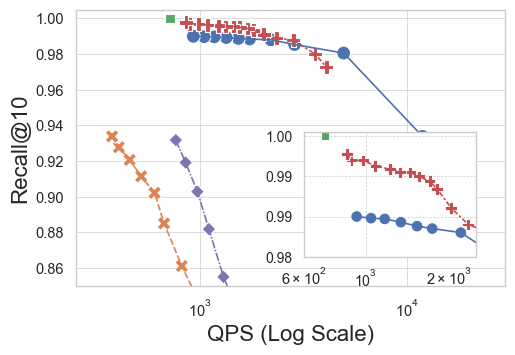

In [56]:
#PAPER  Coorelation 10000

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [11904.8, 4950.5, 2865.33, 2202.64, 1736.11, 1531.39, 1338.69, 1170.96, 1044.93, 927.644],
        "Recall": [0.9339, 0.9806, 0.9854, 0.988, 0.9885, 0.9888, 0.9893, 0.9897, 0.9898, 0.99]
    },

    "ACORN-1 ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [4000, 1650.17, 1140.25, 816.327, 669.792, 602.41, 519.211, 456.621, 404.858, 375.375],
        "Recall": [0.5253, 0.7539, 0.8258, 0.8612, 0.8851, 0.9022, 0.9115, 0.9207, 0.9278, 0.9339]
    },


     
    "Pre filtering":  {
        "Value": [20],
        "Time": [ 713.06],
        "Recall": [1]
    },
    "Query-aware ":   {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [4084.5, 3597.12, 2824.86, 2342.63, 2028.40, 1811.59, 1700.68, 1552.80, 1449.28, 1329.79, 1223.78, 1083.67, 980.39, 888.87, 854.70],
        "Recall": [0.9728, 0.9801, 0.9879, 0.989, 0.9911, 0.9934, 0.9944, 0.995, 0.9955, 0.9955, 0.9959, 0.9963, 0.997, 0.997, 0.9978]
    }, 
     "Post filtering":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [ 14285.7, 7936.51, 5025.13, 3891.06, 3125.00, 2604.17, 2247.19, 2016.13, 1782.53, 1650.17, 1297.92, 1103.75, 970.87, 851.71, 763.36],
        "Recall": [0.3026, 0.5226, 0.6244, 0.6832, 0.7251, 0.7525, 0.7754, 0.7966, 0.8137, 0.8271, 0.8551, 0.8819, 0.9029, 0.9192, 0.9318]
    }
    
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.85, 1.005)
ax.set_xlim(250, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="45%", loc='lower right', borderpad=2)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.985,1.0005)
axins.set_xlim(600, 2.5e3)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()


/tmp/ipykernel_88687/3101081482.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


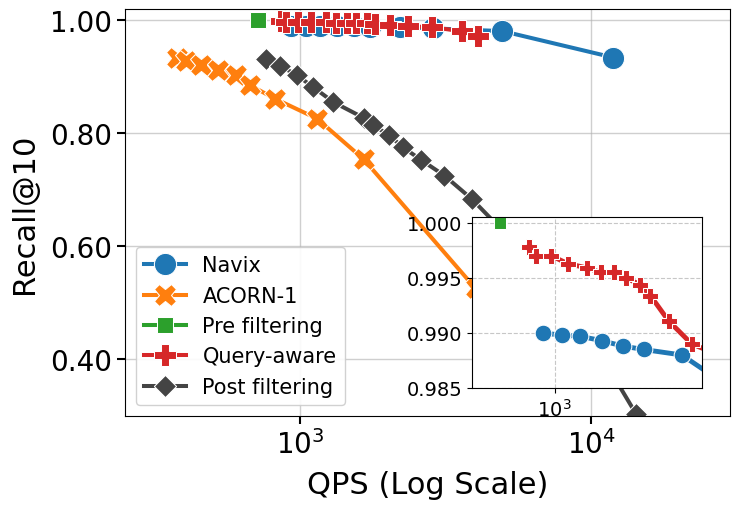

In [44]:
# PAPER Correlation 10000 — With Legend, No Minor Ticks, Custom Post-filtering Color
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterMathtext
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- Flatten helper ---
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for v, t, r in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category.strip(), "Value": v, "Time": t, "Recall": r})
    return pd.DataFrame(rows)

# --- Data ---
schemes = {
   "Navix": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [11904.8, 4950.5, 2865.33, 2202.64, 1736.11, 1531.39, 1338.69, 1170.96, 1044.93, 927.644],
        "Recall": [0.9339, 0.9806, 0.9854, 0.988, 0.9885, 0.9888, 0.9893, 0.9897, 0.9898, 0.99]
    },
   "ACORN-1": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [4000, 1650.17, 1140.25, 816.327, 669.792, 602.41, 519.211, 456.621, 404.858, 375.375],
        "Recall": [0.5253, 0.7539, 0.8258, 0.8612, 0.8851, 0.9022, 0.9115, 0.9207, 0.9278, 0.9339]
    },
   "Pre filtering": {
        "Value": [20],
        "Time": [713.06],
        "Recall": [1]
    },
   "Query-aware": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [4084.5, 3597.12, 2824.86, 2342.63, 2028.40, 1811.59, 1700.68, 1552.80, 1449.28, 1329.79,
                 1223.78, 1083.67, 980.39, 888.87, 854.70],
        "Recall": [0.9728, 0.9801, 0.9879, 0.989, 0.9911, 0.9934, 0.9944, 0.995, 0.9955, 0.9955,
                   0.9959, 0.9963, 0.997, 0.997, 0.9978]
    },
   "Post filtering": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [14285.7, 7936.51, 5025.13, 3891.06, 3125.00, 2604.17, 2247.19, 2016.13, 1782.53, 1650.17,
                 1297.92, 1103.75, 970.87, 851.71, 763.36],
        "Recall": [0.3026, 0.5226, 0.6244, 0.6832, 0.7251, 0.7525, 0.7754, 0.7966, 0.8137, 0.8271,
                   0.8551, 0.8819, 0.9029, 0.9192, 0.9318]
    }
}

df = flatten_schemes(schemes)

# --- Style params ---
LABEL_FONTSIZE = 22
TICK_FONTSIZE = 20
LINE_WIDTH = 2.9
MARKER_SIZE = 16

# --- Custom palette (Post filtering in dark gray) ---
base_palette = sns.color_palette("tab10", n_colors=5)
custom_palette = {
    "Navix": base_palette[0],
    "ACORN-1": base_palette[1],
    "Pre filtering": base_palette[2],
    "Query-aware": base_palette[3],
    "Post filtering": "#444444"  # 🔹 dark gray for contrast
}

# --- Main Plot ---
fig, ax = plt.subplots(figsize=(7.5, 5.2))
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    linewidth=LINE_WIDTH, markers=True, markersize=MARKER_SIZE,
    dashes=False, ax=ax, palette=custom_palette
)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE, labelpad=8)
ax.set_ylim(0.30, 1.019)
ax.set_xlim(250, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=1.0, alpha=0.6)
ax.tick_params(axis='both', labelsize=TICK_FONTSIZE, width=1.5, length=6)
ax.minorticks_off()  # 🔹 disable minor ticks
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# --- Legend ---
ax.legend(
    title_fontsize=16, fontsize=15,
    loc="lower left", frameon=True, fancybox=True, framealpha=0.9
)

# --- Inset (zoomed region) ---
axins = inset_axes(ax, width="38%", height="42%", loc='lower right', borderpad=2)
sns.lineplot(
    data=df, x="Time", y="Recall", hue="Category", style="Category",
    linewidth=3.5, markers=True, markersize=12, dashes=False,
    ax=axins, legend=False, palette=custom_palette
)

axins.set_xscale("log")
axins.set_ylim(0.985, 1.0005)
axins.set_xlim(600, 2.5e3)
axins.grid(True, linestyle="--", linewidth=0.8, alpha=0.7)
axins.tick_params(labelsize=14)
axins.minorticks_off()  # 🔹 disable minor ticks
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.3f}'))
axins.set_xlabel('')
axins.set_ylabel('')

# --- Save or Show ---
plt.tight_layout()
plt.savefig("/data3/Adeel/Query-AwareResult/Corelation10000.pdf",
            format="pdf", bbox_inches="tight", dpi=600)
plt.show()


/tmp/ipykernel_3308/649613565.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


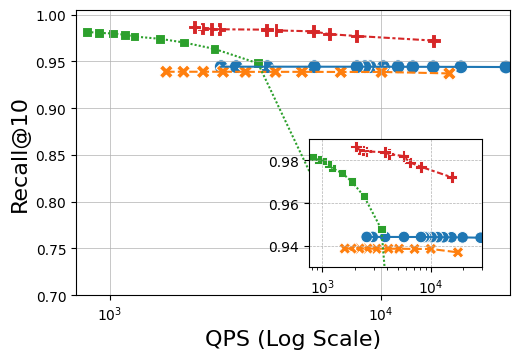

In [8]:
#Dedicated Solution TRIP CLICK

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "UNG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 1000, 2000, 3000, 4000],
        "Time": [68493.15, 28985.51, 19762.85, 15625, 13136.91, 11586.33, 10225.46, 9124.09, 8741.26, 8169.61, 5688.99, 3815.78, 2928.08, 2575.88, 2198.26],
        "Recall": [0.94122, 0.94384, 0.94401, 0.94405, 0.94408, 0.94413,  0.94415, 0.94416, 0.94417, 0.94418, 0.94419, 0.94421, 0.94421, 0.94421, 0.94421]
    },

    "TAG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [17921.15, 10070.0, 7121.37, 5119.34, 4089.57, 3166.62, 2616.75, 2209.39, 1870.6, 1615.92],
        "Recall": [0.9370, 0.9386, 0.9386, 0.9387, 0.9387, 0.9387, 0.9388, 0.9388, 0.9388, 0.9388]
    },
   
    "ACORN-\u03B3":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [6711.41, 3521.13, 2433.09, 1876.17, 1531.39, 1228.5, 1135.07, 1025.64, 909.918, 824.402],

        "Recall": [0.7773, 0.9478, 0.9632, 0.9701, 0.9740, 0.9765, 0.9784, 0.9797, 0.9804, 0.9814]
    },
    "Query-aware ":   {
         "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [15675, 8155, 6463, 5635, 4109, 3792, 2533, 2366, 2197, 2053],
        "Recall": [0.9721, 0.977, 0.979, 0.982, 0.983, 0.9838, 0.9842, 0.9846, 0.9850, 0.9865]
    }
    
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.70, 1.005)
ax.set_xlim(750, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="45%", loc='lower right', borderpad=2)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.93,0.99)
axins.set_xlim(750, 3e4)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()



/tmp/ipykernel_83636/3091262793.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


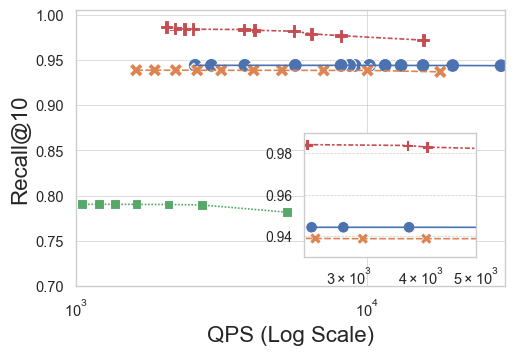

In [58]:
#Dedicated Solution TRIP CLICK

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "UNG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 1000, 2000, 3000, 4000],
        "Time": [68493.15, 28985.51, 19762.85, 15625, 13136.91, 11586.33, 10225.46, 9124.09, 8741.26, 8169.61, 5688.99, 3815.78, 2928.08, 2575.88, 2198.26],
        "Recall": [0.94122, 0.94384, 0.94401, 0.94405, 0.94408, 0.94413,  0.94415, 0.94416, 0.94417, 0.94418, 0.94419, 0.94421, 0.94421, 0.94421, 0.94421]
    },

    "TAG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [17921.15, 10070.0, 7121.37, 5119.34, 4089.57, 3166.62, 2616.75, 2209.39, 1870.6, 1615.92],
        "Recall": [0.9370, 0.9386, 0.9386, 0.9387, 0.9387, 0.9387, 0.9388, 0.9388, 0.9388, 0.9388]
    },


     
    "ACORN-\u03B3":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [ 5336.18, 2712.97, 2086.81, 1619.96, 1366.31, 1199.76, 1052.19, 939.408, 855.871, 783.392],
        "Recall": [ 0.7816, 0.7897, 0.7902, 0.7903, 0.7904, 0.7904, 0.7904, 0.7905, 0.7905, 0.7905]
    },
    "Query-aware ":   {
         "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [15675, 8155, 6463, 5635, 4109, 3792, 2533, 2366, 2197, 2053],
        "Recall": [0.9721, 0.977, 0.979, 0.982, 0.983, 0.9838, 0.9842, 0.9846, 0.9850, 0.9865]
    }
    
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.70, 1.005)
ax.set_xlim(1000, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="45%", loc='lower right', borderpad=2)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.93,0.99)
axins.set_xlim(2500, 5e3)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()



/tmp/ipykernel_83636/2606444086.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


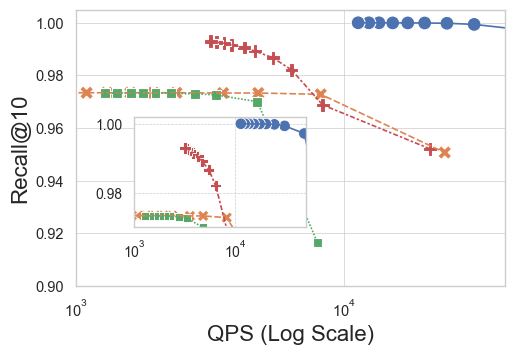

In [59]:
# Dedicated Solution For SIFT

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "UNG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 1000, 2000, 3000, 4000],
        "Time": [112359.55, 47846.41, 30581.35, 24213.08, 20000, 17301.04, 15197.57, 13513.51, 12387.46, 11299.44],
        "Recall": [0.94676, 0.99716, 0.99936, 0.9998, 0.9999, 0.99992, 0.99993, 0.99996, 0.99997, 0.99998]
    },

    "TAG ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [23753.44, 8200.16, 4796.18, 3546.10, 2375.89, 1950.90, 1599.74, 1308.07, 1099.32, 947.52],
        "Recall": [0.9507, 0.9728, 0.9733, 0.9733, 0.9734, 0.9734, 0.9734, 0.9734, 0.9734, 0.9734]
    },


     
    "ACORN-\u03B3":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [ 7968.13, 4759.64, 3330, 2792.52, 2273.76, 1985.7, 1778.09, 1612.64, 1425.92, 1284.52],
        "Recall": [ 0.9165, 0.9700, 0.9726, 0.9730, 0.9732, 0.9733, 0.9733, 0.9733, 0.9733, 0.9733]
    },
     "Query-aware ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [20921, 8328, 6378, 5435, 4661, 4252, 3811, 3574, 3350, 3188],
        "Recall": [0.9521, 0.9688, 0.9821, 0.9867, 0.9892, 0.9906, 0.9915, 0.9922, 0.9926, 0.9929]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.90, 1.005)
ax.set_xlim(1000, 4e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="40%", loc='lower left', borderpad=4)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.97,1.002)
axins.set_xlim(1000, 5e4)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()



/tmp/ipykernel_83636/3529341370.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


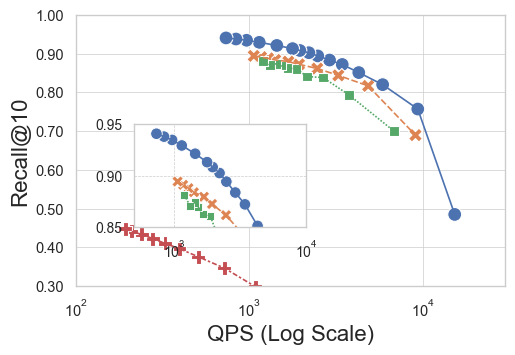

In [60]:
# Range Search Results
# VIDEO VIEWS


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Proposed PF ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [15306, 9375, 5882, 4286, 3440, 2907, 2488, 2210, 1961, 1779, 1445, 1144, 967, 840, 736],
        "Recall": [0.4849, 0.7572, 0.8202, 0.8514, 0.8723, 0.8838, 0.8944, 0.9027, 0.9085, 0.9133, 0.9215, 0.9295, 0.9349, 0.9381, 0.9409]
    },

    "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [9090.91, 4854.37, 3267.97, 2471.17, 1937.98, 1683.50, 1413.76, 1286.45, 1171.88, 1063.83],
        "Recall": [0.6898, 0.8170, 0.8441, 0.8618, 0.8727, 0.8797, 0.8841, 0.8881, 0.8913, 0.8945]
    },


     
    "Query-aware naive":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560],
        "Time": [ 6849.77, 3783.62, 2669.18, 2155.17, 1875.00, 1665.93, 1522.01, 1431.30, 1320.42, 1196.81],
        "Recall": [ 0.6997, 0.7929, 0.8385, 0.8411, 0.8612, 0.8627, 0.8697, 0.8741, 0.871, 0.8813]
    },
     "ACORN-1 ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [2293.58, 1086.17, 719.08, 510.38, 397.14, 327.80, 278.24, 240.15, 209.85, 193.35],
        "Recall": [0.1851, 0.2983, 0.3464, 0.3753, 0.3963, 0.4101, 0.4225, 0.4332, 0.4410, 0.4482]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.3, 1)
ax.set_xlim(100, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="38%", loc='lower left', borderpad=4)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.85,0.95)
axins.set_xlim(500, 10e3)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()





/tmp/ipykernel_83636/3125379034.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


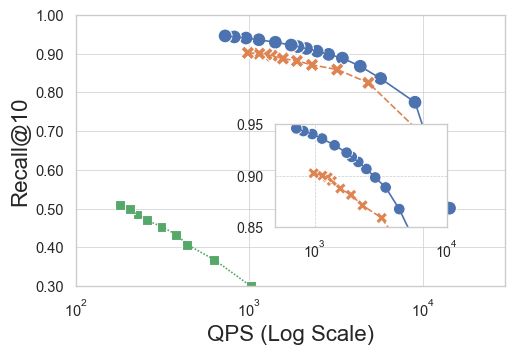

In [61]:
# Range Search Results
# VIDEO Like


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Proposed PF ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [14285.71, 9036.14, 5725.19, 4370.55, 3448.28, 2873.56, 2464.00, 2139.80, 1909.93, 1747.09, 1416.43, 1138.10, 960.30, 821.92, 727.19],
        "Recall": [0.5011, 0.7747, 0.8361, 0.8677, 0.8887, 0.8984, 0.9067, 0.9135, 0.9184, 0.9225, 0.9297, 0.9362, 0.9406, 0.9435, 0.9461]
    },

    "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [9803.92, 4870.13, 3218.88, 2304.15, 1886.79, 1565.76, 1350.14, 1257.33, 1144.16, 983.61],
        "Recall": [0.6938, 0.8250, 0.8591, 0.8713, 0.8815, 0.8877, 0.8951, 0.8985, 0.9003, 0.9025]
    },

     "ACORN-1 ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [2392.34, 1023.19, 629.723, 440.788, 380.904, 313.022, 258.665, 227.514, 205.677, 181.181],
        "Recall": [0.1515, 0.2996, 0.3679, 0.4067, 0.4328, 0.4533, 0.4695, 0.4847, 0.4983, 0.5085]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.3, 1)
ax.set_xlim(100, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="38%", loc='lower right', borderpad=4)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.85,0.95)
axins.set_xlim(500, 10e3)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()





/tmp/ipykernel_83636/2289830711.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


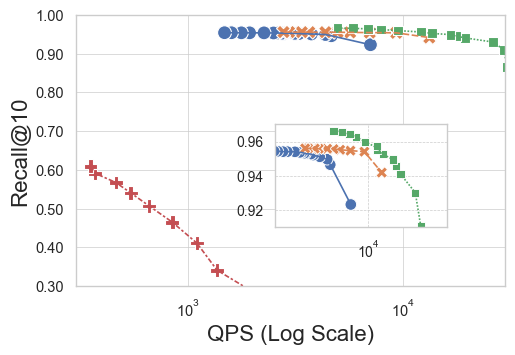

In [62]:
# Range Search Results
# AUDIO Like


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Query-aware naive ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [7064.71, 4643.97, 4360.47, 3750.00, 3280.35, 3138.91, 2803.74, 2737.23, 2604.17, 2500.00, 2259.04, 1935.48, 1771.78, 1593.56, 1479.37],
        "Recall": [0.9233, 0.9465, 0.9497, 0.9511, 0.9521, 0.9527, 0.9529, 0.9532, 0.9536, 0.9537, 0.9540, 0.9541, 0.9541, 0.9543, 0.9544]
    },

    "Navix ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [13274, 9317, 7009, 5682, 4967, 4360, 3667, 3386, 2953, 2783],
        "Recall": [0.9419, 0.9541, 0.9547, 0.9552, 0.9556, 0.9558, 0.9558, 0.9559, 0.9560, 0.9560]
    },

    "Proposed PF ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [ 45454, 30612, 29412, 26316, 19481, 17647, 16667, 13636, 12097, 12097, 9494, 7895, 6881, 5837, 4967],
        "Recall": [ 0.6233, 0.8663, 0.9107, 0.9302, 0.9410, 0.9457, 0.9495, 0.9526, 0.9551, 0.9574, 0.9599, 0.9626, 0.9643, 0.9657, 0.9663]
    },


     "ACORN ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [4615, 2517, 1366, 1100, 846, 660, 542, 462, 370, 352],
        "Recall": [0.1079, 0.2517, 0.3408, 0.4109, 0.4648, 0.5068, 0.5404, 0.5673, 0.5911, 0.6093]
    }
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.3, 1)
ax.set_xlim(300, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="38%", loc='lower right', borderpad=4)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.91,0.97)
axins.set_xlim(1500, 5e4)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()





/tmp/ipykernel_83636/3519036054.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


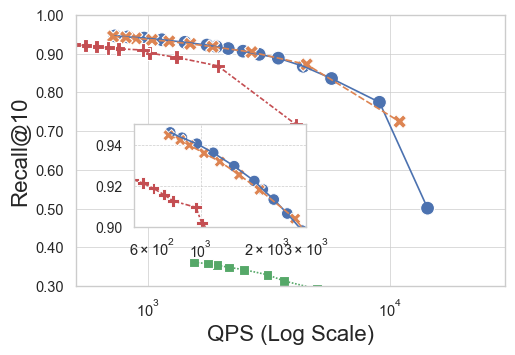

In [63]:
#Dedicated Range search
# Range Search Results
# VIDEO Like


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
   "Proposed Query-aware PF ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [14285.71, 9036.14, 5725.19, 4370.55, 3448.28, 2873.56, 2464.00, 2139.80, 1909.93, 1747.09, 1416.43, 1138.10, 960.30, 821.92, 727.19],
        "Recall": [0.5011, 0.7747, 0.8361, 0.8677, 0.8887, 0.8984, 0.9067, 0.9135, 0.9184, 0.9225, 0.9297, 0.9362, 0.9406, 0.9435, 0.9461]
    },

    "IRange graph ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [10948.9, 4518.07, 2673.8, 1845.02, 1491.05, 1220.5, 1035.2, 888.099, 807.754, 714.967],
        "Recall": [0.7247, 0.8723, 0.9042, 0.9182, 0.9255, 0.9319, 0.9360, 0.9399, 0.9424, 0.9447]
    },

     "SERF ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
       
        "Time": [15000, 7772, 5000, 3649, 3112, 2488, 2164, 1929, 1760, 1548],
        "Recall": [0.1429, 0.2561, 0.2919, 0.3129, 0.3290, 0.3421, 0.3480, 0.3535, 0.3579, 0.3609],
    },
      "ACORN-\u03B3 ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [4087.19, 1937.98, 1306.62, 1012.15, 951.173, 750.375, 680.581, 610.749, 548.446, 494.56],
        "Recall": [0.7168, 0.8688, 0.8907, 0.9019, 0.9097, 0.9128, 0.9159, 0.9189, 0.9214, 0.9232] 
    },
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.3, 1)
ax.set_xlim(500, 3e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
axins = inset_axes(ax, width="40%", height="38%", loc='lower left', borderpad=4)
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

axins.set_xscale("log")
axins.set_ylim(0.90,0.95)
axins.set_xlim(500, 3e3)
axins.grid(True, linestyle="--", linewidth=0.5)
axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()





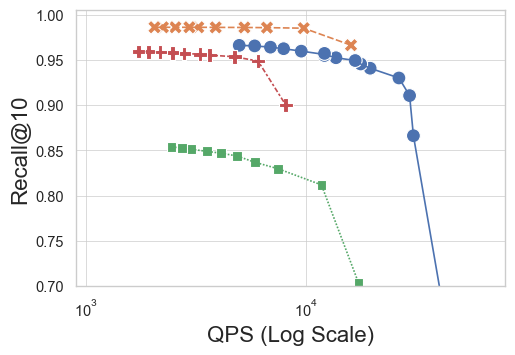

In [64]:
#Dedicated Range search
# Range Search Results
# AUDIO Like


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# Flatten the schemes for plotting
def flatten_schemes(schemes):
    rows = []
    for category, metrics in schemes.items():
        for value, time, recall in zip(metrics["Value"], metrics["Time"], metrics["Recall"]):
            rows.append({"Category": category, "Value": value, "Time": time, "Recall": recall})
    return pd.DataFrame(rows)

# Refactored data structure
schemes = {
    "Proposed PF ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [ 45454, 30612, 29412, 26316, 19481, 17647, 16667, 13636, 12097, 12097, 9494, 7895, 6881, 5837, 4967],
        "Recall": [ 0.6233, 0.8663, 0.9107, 0.9302, 0.9410, 0.9457, 0.9495, 0.9526, 0.9551, 0.9574, 0.9599, 0.9626, 0.9643, 0.9657, 0.9663]
    },

    "IRange graph ": {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [15957.4, 9740.26, 6637.17, 5244.76, 3886.01, 3239.74, 2952.76, 2551.02, 2238.81, 2051.98],
        "Recall": [0.9665, 0.9853, 0.9859, 0.9861, 0.9862, 0.9863, 0.9863, 0.9863, 0.9863, 0.9863]
    },

     "SERF ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
       
        "Time": [17241, 11718, 7425, 5832, 4854, 4098, 3546, 3012, 2727, 2451],
        "Recall": [0.7037, 0.8119, 0.8299, 0.8370, 0.8439, 0.8470, 0.8490, 0.8513, 0.8529, 0.8538],
    },
      "ACORN-\u03B3 ":  {
        "Value": [20, 80, 140, 200, 260, 320, 380, 440, 500, 560 ],
        "Time": [8064.52, 6048.39, 4731.86, 3649.64, 3296.7, 2788.1, 2471.17, 2173.91, 1925.55, 1736.11],
        "Recall": [0.9005, 0.9489, 0.9537, 0.9555, 0.9565, 0.9573, 0.9581, 0.9588, 0.9594, 0.9595] 
    },
}
df = flatten_schemes(schemes)

# Main plot
fig, ax = plt.subplots(figsize=(5.3, 3.7))
sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=100, ax=ax, legend=False)
sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", legend=False, ax=ax)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=16)
ax.set_ylabel("Recall@10", fontsize=16)
ax.set_ylim(0.7, 1.005)
ax.set_xlim(900, 8e4)
ax.grid(True, which='major', linestyle="-", linewidth=0.5)
ax.tick_params(axis='both', which='minor', length=4, width=1, direction='in', bottom=False)

# Format x-axis as powers of 10
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Inset: zoomed subgraph (0.97 to 0.99)
# axins = inset_axes(ax, width="40%", height="38%", loc='lower left', borderpad=4)
# sns.scatterplot(data=df, x="Time", y="Recall", hue="Category", style="Category", s=70, ax=axins, legend=False)
# sns.lineplot(data=df, x="Time", y="Recall", hue="Category", style="Category", ax=axins, legend=False)

# axins.set_xscale("log")
# axins.set_ylim(0.90,0.95)
# axins.set_xlim(500, 3e3)
# axins.grid(True, linestyle="--", linewidth=0.5)
# axins.tick_params(labelsize=10)

# Format inset ticks as powers of 10
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Remove axis labels for inset
axins.set_xlabel('')
axins.set_ylabel('')

plt.tight_layout()
plt.show()





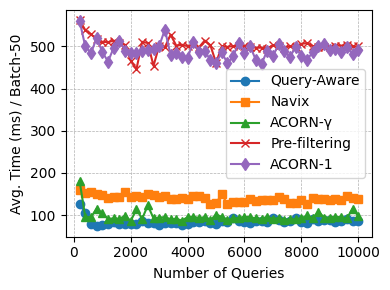

In [1]:
import matplotlib.pyplot as plt

# X-axis (avoid 0 for log scale)
x = list(range(200, 10200, 200))  # 200 → 10000

query_aware = [
    127,105,78,73,76,78,83,79,79,78,
    79,86,81,80,77,80,82,81,77,79,
    84,84,87,81,79,85,83,92,86,84,
    82,86,85,84,94,89,84,86,93,84,
    82,90,86,88,89,83,86,90,87,86
]

navix = [
    159,152,155,151,147,141,142,142,154,143,
    144,143,150,147,142,145,139,139,140,137,
    146,144,141,125,128,150,125,130,131,132,
    137,133,135,136,135,142,137,129,129,135,
    126,141,138,139,136,139,136,146,140,138
]

pre_filtering = [
    562,539,529,517,511,510,514,507,504,466,
    446,511,508,454,502,498,528,502,504,501,
    503,498,514,503,461,500,499,501,501,502,
    499,497,497,495,503,501,496,501,498,506,
    508,501,498,499,498,502,502,503,500,500
]

acorn_gamma = [
    181,95,95,115,104,91,92,91,98,86,
    114,91,123,92,94,95,90,91,87,95,
    96,93,95,88,101,96,88,92,93,96,
    95,92,91,96,91,93,89,90,90,92,
    99,92,108,94,94,96,95,92,115,98
]

acorn_1 = [
    561,500,484,520,487,464,497,514,490,485,
    485,488,491,495,501,540,480,484,475,473,
    511,487,488,469,460,486,460,477,509,485,
    500,468,459,490,477,505,488,475,499,477,
    469,486,500,505,491,493,487,498,482,492
]

plt.figure(figsize=(4, 3))

plt.plot(x, query_aware, marker='o', label="Query-Aware")
plt.plot(x, navix, marker='s', label="Navix")
plt.plot(x, acorn_gamma, marker='^', label="ACORN-γ")
plt.plot(x, pre_filtering, marker='x', label="Pre-filtering")
plt.plot(x, acorn_1, marker='d', label="ACORN-1")

#plt.yscale('log')  # 🔥 LOG SCALE
plt.xlabel("Number of Queries")
plt.ylabel("Avg. Time (ms) / Batch-50")

plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# This graph depicts the average time in milliseconds for a batch of 50 tuples from a large dataset consisting of 10,000 queries, where the selectivity of each label is uniformly distributed. The results indicate that the proposed query-aware approach initially selects prefiltering only for those queries that have not been seen before. 

#For the inital batches, some queries that employ the prefiltering approach have slightly higher execution times. However, as the number of queries increases, most queries do not choose the prefiltering approach, as they utilize the information from already executed queries. The results show that at the beginning of the batches, the query execution is better, averaging around 78 milliseconds. As the number of queries increases, the execution time also increases due to the growing depth of the tree for each label. 

# Nevertheless, the proposed query-aware approach still performs significantly better in terms of time computation—almost 2 times faster than the agnostic approach, 1.2 times faster than Acorn-gamma, and 6 times faster than the extended Acorn-gamma, which is based on the HNSW graph structure (ACORN-1 and hnsw ).

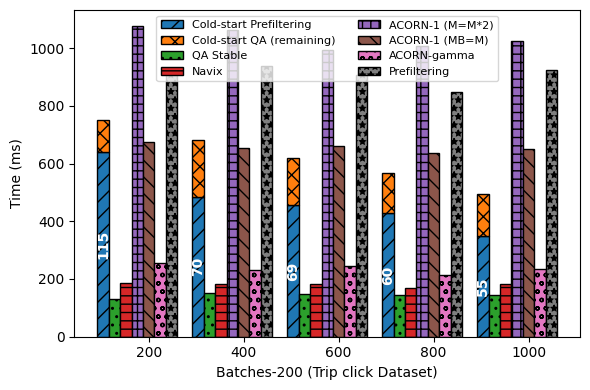

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------- Data ----------------
batches = [200, 400, 600, 800, 1000]
total_count = [115, 70, 69, 60, 55]

# Cold-start QA
cold_start_qa = [750, 680, 619, 568, 495]
prefilter_cold = [639, 484, 455, 428, 350]
cold_remaining = [c - p for c, p in zip(cold_start_qa, prefilter_cold)]

# Other methods
pre_filtering = [913, 937, 906, 847, 923]
qa_stable = [129, 150, 148, 143, 143]
navix = [186, 184, 181, 169, 181]
acorn1_mm2 = [1078, 1061, 993, 1007, 1024]
acorn1_mb = [674, 654, 660, 635, 651]
acorn_gamma = [255, 232, 245, 215, 233]

# ---------------- Plot ----------------
x = np.arange(len(batches))
width = 0.12

plt.figure(figsize=(6, 4))

# Cold-start QA (stacked bar)
plt.bar(
    x - 4*width,
    prefilter_cold,
    width,
    label="Cold-start Prefiltering",
    hatch="//",
    edgecolor="black"
)
plt.bar(
    x - 4*width,
    cold_remaining,
    width,
    bottom=prefilter_cold,
    label="Cold-start QA (remaining)",
    hatch="xx",
    edgecolor="black"
)

# Other methods (single bars)
plt.bar(x - 3*width, qa_stable, width, label="QA Stable", hatch="..", edgecolor="black")
plt.bar(x - 2*width, navix, width, label="Navix", hatch="--", edgecolor="black")
plt.bar(x - width, acorn1_mm2, width, label="ACORN-1 (M=M*2)", hatch="++", edgecolor="black")
plt.bar(x, acorn1_mb, width, label="ACORN-1 (MB=M)", hatch="\\\\", edgecolor="black")
plt.bar(x + width, acorn_gamma, width, label="ACORN-gamma", hatch="oo", edgecolor="black")
plt.bar(x + 2*width, pre_filtering, width, label="Prefiltering", hatch="**", edgecolor="black")

# Annotate total query count inside Cold-start Prefiltering bar (white text only)
for i, count in enumerate(total_count):
    plt.text(
        x[i] - 4*width,
        prefilter_cold[i] / 2,   # center inside prefiltering bar
        str(count),
        ha="center",
        va="center",
        fontsize=10,
        rotation=90,
        color="white",
        fontweight="bold"
    )

# Axes labels
plt.xticks(x, batches)
plt.xlabel("Batches-200 (Trip click Dataset)")
plt.ylabel("Time (ms)")

# Legend
plt.legend(fontsize=8, ncol=2)

plt.tight_layout()
plt.show()


✅ Combined CSV written to: /data3/Adeel/PaperResultsForQweryAware/RegressionModelResultPaper/combined_avg_error.csv


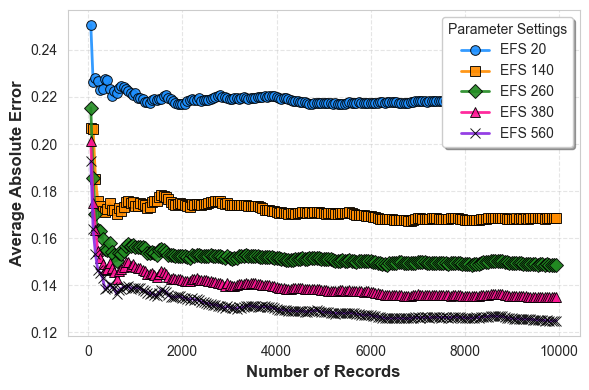

In [3]:
# Error of model
# Model PRedication Error Plotting with number of queries 
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# CONFIGURATION
# =========================

base_path = "/data3/Adeel/PaperResultsForQweryAware/RegressionModelResultPaper"

files = {
    "20":  "recall_data20.csv",
    "140": "recall_data140.csv",
    "260": "recall_data260.csv",
    "380": "recall_data380.csv",    
    "560": "recall_data560.csv"
}

# Mapping specific markers and colors to each threshold for better visibility
styles = {
    "20":  {"color": "#1E90FF", "marker": "o"}, # Dodger Blue Circle
    "140": {"color": "#FF8C00", "marker": "s"}, # Dark Orange Square
    "260": {"color": "#228B22", "marker": "D"}, # Forest Green Diamond
    "380": {"color": "#FF1493", "marker": "^"}, # Deep Pink Triangle
    "560": {"color": "#8A2BE2", "marker": "x"}  # Blue Violet Down-Triangle
}

step = 50
output_csv = os.path.join(base_path, "combined_avg_error.csv")

# =========================
# READ & PROCESS FILES
# =========================

all_results = {}
record_counts = None

for label, filename in files.items():
    path = os.path.join(base_path, filename)
    errors = []

    try:
        with open(path, "r") as f:
            reader = csv.DictReader(f)
            for row in reader:
                actual = float(row["ActualRecall"])
                predicted = float(row["PredictedRecall"])
                errors.append(abs(actual - predicted))

        total_records = len(errors)

        # Initialize record_counts based on the first file processed
        if record_counts is None:
            record_counts = list(range(step, total_records + 1, step))

        # Calculate cumulative moving average error
        avg_errors = []
        for i in record_counts:
            avg_errors.append(sum(errors[:i]) / i)

        all_results[label] = avg_errors
    
    except FileNotFoundError:
        print(f"⚠️ Warning: {filename} not found in {base_path}. Skipping.")
    except Exception as e:
        print(f"❌ Error processing {filename}: {e}")

# =========================
# WRITE COMBINED CSV
# =========================

if record_counts:
    with open(output_csv, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Records"] + list(all_results.keys()))

        for idx, rec in enumerate(record_counts):
            row = [rec]
            for label in all_results.keys():
                row.append(f"{all_results[label][idx]:.6f}")
            writer.writerow(row)

    print("✅ Combined CSV written to:", output_csv)

# =========================
# PLOT RESULTS
# =========================

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid", {'grid.linestyle': '--'})

for label in all_results.keys():
    plt.plot(
        record_counts, 
        all_results[label], 
        label=f"EFS {label}",
        color=styles[label]["color"],
        marker=styles[label]["marker"],
        markersize=7,
        linewidth=2,
        markeredgecolor='black',  # Black outline makes the color pop
        markeredgewidth=0.7,
        alpha=0.9                 # Slight transparency for overlapping lines
    )

# Formatting the Chart
plt.xlabel("Number of Records", fontsize=12, fontweight='bold')
plt.ylabel("Average Absolute Error", fontsize=12, fontweight='bold')


plt.legend(title="Parameter Settings", frameon=True, shadow=True, loc='best')
plt.grid(True, which='both', linestyle='--', alpha=0.5)

# Ensure the y-axis starts logically (usually 0 for error)
plt.tight_layout()
plt.show()

In [ ]:
# Number of nodes upto level 0 exploration 


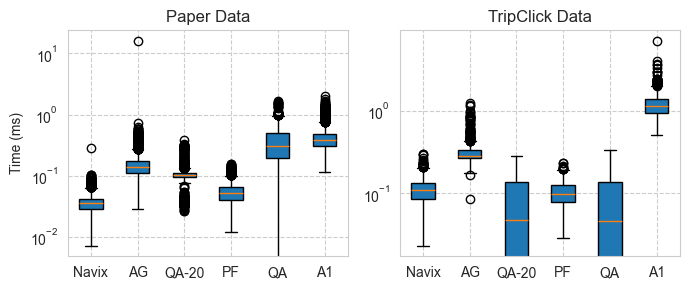

In [4]:
# Time comparasion of proposed approach vs rest of other for graph traversing to the layer o and proposed tree traversing 
import pandas as pd
df_paper = pd.read_csv('/data3/Adeel/PaperResultsForQweryAware/PaperResultForTimeForgrpahgreedysearch/Paper.csv', nrows=10000)

# Load trip click CSV
df_trip_click = pd.read_csv('/data3/Adeel/PaperResultsForQweryAware/TripClickResultForGreedySearch/TripClick.csv',  nrows=1000)
# Rename columns
df_paper.rename(columns={
    'ACORNgamma': 'Acorn-gamma',
    'Query_aware_quantized20': 'QA-quantized-20',
    'Query_aware': 'QA',
    'Postfitlering': 'PF',
    'ACORN1': 'Acorn1',
    'Query_aware_quantized': 'QA-quantized',
    'time': 'Navix'   # keeps same name, optional
}, inplace=True)

df_trip_click.rename(columns={
    'ACORNgamma': 'Acorn-gamma',
    'Query_aware_quantizedfull_quantized': 'QA-quantized-20',
    'Query_aware_quantizedfull': 'QA',
    'Postfitlering': 'PF',
    'ACORN1': 'Acorn1',
    'Query_aware_quantized': 'QA-quantized',
    'navix_greedy_search_time': 'Navix'   # keeps same name, optional
}, inplace=True)

# Tree Exploration Time
import matplotlib.pyplot as plt

# Columns to plot
columns_to_plot = ['Navix', 'Acorn-gamma', 'QA-quantized-20', 'PF', 'QA', 'Acorn1']

# Shorter labels for x-axis
short_labels = ['Navix', 'AG', 'QA-20', 'PF', 'QA', 'A1']

# Create figure with 1 row, 2 columns (side by side)
plt.figure(figsize=(7, 3))

# Boxplot for Paper
plt.subplot(1, 2, 1)
plt.boxplot([df_paper[col].dropna() for col in columns_to_plot], patch_artist=True)
plt.xticks(range(1, len(short_labels)+1), short_labels)
plt.title('Paper Data')
plt.ylabel('Time (ms)')
plt.yscale('log')  # Logarithmic scale

# Boxplot for TripClick
plt.subplot(1, 2, 2)
plt.boxplot([df_trip_click[col].dropna() for col in columns_to_plot], patch_artist=True)
plt.xticks(range(1, len(short_labels)+1), short_labels)
plt.title('TripClick Data')
plt.yscale('log')  # Logarithmic scale

plt.tight_layout()
plt.show()


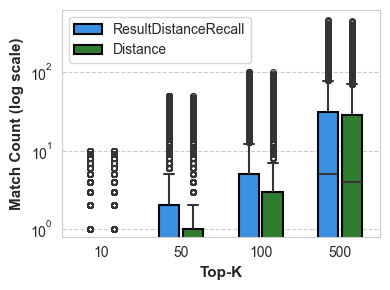

In [8]:
# This is actually a plot for recall and distance collective and distance alone just to show that how mush of the keys have been identified during the tree traverisng
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... [Your data loading code remains the same] ...

# 1. Set the style for a clean look
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize=(4, 3))

# 2. Define high-visibility colors
# Using more saturated colors similar to your reference image
vibrant_colors = ["#1E90FF", "#228B22"] # DodgerBlue and ForestGreen

# 3. Create the boxplot
ax = sns.boxplot(
    data=df_all, 
    x="Threshold", 
    y="MatchCount", 
    hue="Type", 
    palette=vibrant_colors,
    showfliers=True,
    width=0.6,           # Makes bars slimmer to create space between groups
    gap=0.15,            # Creates a physical gap between the two bars in a group
    linewidth=1.5,       # Makes the box outlines thicker and more visible
    fliersize=4          # Adjusts size of outlier dots
)

# 4. Enhance the visual outline
# This adds a black edge to every box to make them "pop" against the white background
for patch in ax.patches:
    patch.set_edgecolor('black')

# 5. Handle Log Scale and Visibility
plt.yscale("log")

# Setting the bottom limit to 0.8 is crucial so that boxes 
# with a value of 1 aren't cut off by the X-axis line.
plt.ylim(bottom=0.8) 

# 6. Labels and Legend
plt.xlabel("Top-K", fontsize=11, fontweight='bold')
plt.ylabel("Match Count (log scale)", fontsize=11, fontweight='bold')

plt.legend(
    title="", 
    loc='upper left', 
    frameon=True, 
    fontsize='medium'
)

plt.tight_layout()
plt.show()

/tmp/ipykernel_59420/3755356677.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


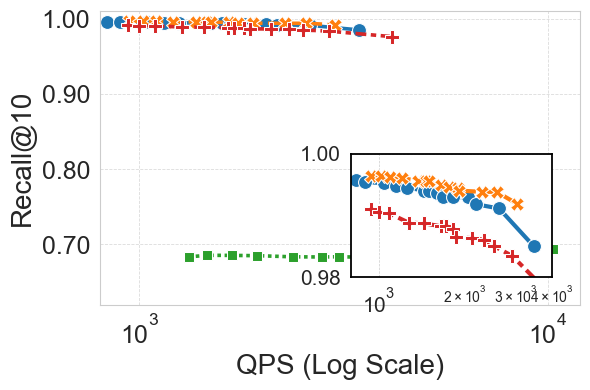

In [9]:
# Trip click Crumbled value
# Trip Click with Zoomed Inset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# -----------------------------
# Data
# -----------------------------
schemes = {
    "Query-aware (Tree)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [3448.28, 2617.8, 2169.2, 2036.66, 1814.88, 1666.67, 1592.36, 1494.77,
                 1438.85, 1253.13, 1146.79, 1042.75, 898.47, 834.72],
        "Recall": [0.9850, 0.9911, 0.9918, 0.9929, 0.9929, 0.9930, 0.9936, 0.9940,
                   0.9940, 0.9945, 0.9947, 0.9952, 0.9954, 0.9957]
    },

    "Query-aware (Full-scan)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [3012.05, 2564.1, 2277.9, 1901.36, 1890.14, 1748.25, 1652.89, 1494.77,
                 1464.13, 1375.52, 1209.19, 1096.49, 1021.45, 942.51],
        "Recall": [0.9919, 0.9938, 0.9938, 0.9940, 0.9945, 0.9946, 0.9949, 0.9955,
                   0.9955, 0.9956, 0.9960, 0.9962, 0.9963, 0.9964]
    },

    "Query-aware (One-hop)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [10309, 8547, 6289, 5208, 4219, 3676, 3425, 3077,
                 2801, 2375, 1946, 1684, 1462, 1319],
        "Recall": [0.6941, 0.6820, 0.6824, 0.6827, 0.6832, 0.6803, 0.6832, 0.6837,
                   0.6834, 0.6836, 0.6851, 0.6855, 0.6856, 0.6835]
    },

    "Query-aware (Directed two-hop)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [4149, 2907, 2513, 2326, 2105, 1862, 1808, 1709,
                 1647, 1437, 1272, 1090, 1000, 939],
        "Recall": [0.9761, 0.9834, 0.9850, 0.9860, 0.9863, 0.9864, 0.9878, 0.9882,
                   0.9882, 0.9887, 0.9888, 0.9903, 0.9906, 0.9910]
    }
}

# -----------------------------
# Flatten data
# -----------------------------
def flatten_schemes(schemes):
    rows = []
    for cat, m in schemes.items():
        for v, t, r in zip(m["Value"], m["Time"], m["Recall"]):
            rows.append({"Category": cat, "Value": v, "Time": t, "Recall": r})
    return pd.DataFrame(rows)

df = flatten_schemes(schemes)

# -----------------------------
# Styling
# -----------------------------
LABEL_FONTSIZE = 20
TICK_FONTSIZE = 18
LINE_WIDTH = 2.6
MARKER_SIZE = 10

# -----------------------------
# Main plot
# -----------------------------
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=df, x="Time", y="Recall",
    hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE,
    ax=ax, legend=False
)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.62, 1.01)
ax.set_xlim(8e2, 1.2e4)

ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))

ax.grid(True, which='major', linewidth=0.6, alpha=0.7)

# -----------------------------
# Inset (Zoomed View)
# -----------------------------
axins = inset_axes(ax, width="42%", height="42%", loc="lower right", borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall",
    hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.4,
    markersize=MARKER_SIZE,
    ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_xlim(8e2, 4e3)
axins.set_ylim(0.98, 1.0)

axins.tick_params(labelsize=TICK_FONTSIZE - 3)
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))
axins.grid(True, linestyle="--", linewidth=0.5)

axins.set_xlabel("")
axins.set_ylabel("")

for spine in axins.spines.values():
    spine.set_linewidth(1.3)
    spine.set_color("black")

plt.tight_layout()
plt.show()


/tmp/ipykernel_59420/1213246703.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


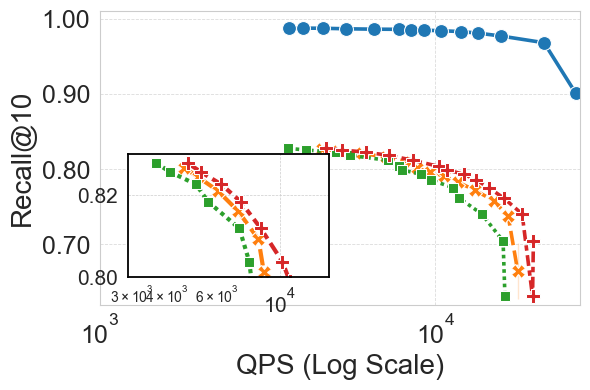

In [10]:
# Paper Crumbled 
# Trip Click with Zoomed Inset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogFormatterMathtext

# -----------------------------
# Data
# -----------------------------
schemes = {
    "Query-aware (Proposed)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [
  26246.72,
  21097.05,
  15698.58,
  13440.86,
  11933.18,
  10416.67,
   9259.26,
   8459.38,
   7770.01,
   6557.38,
   5417.12,
   4632.07,
   4040.40,
   3661.30],
        "Recall": [0.9006, 0.9680, 0.9769, 0.9807, 0.9828, 0.9839, 0.9847, 0.9854, 0.9858, 0.9860, 0.9865, 0.9872, 0.9874, 0.9876, 0.9877]
    },

    "Query-aware (Two-scan)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [17605.63,
  17605.63,
  16501.65,
  14925.37,
  13107.46,
  11682.24,
  10615.71,
   9633.91,
   8796.14,
   8417.51,
   7112.38,
   6035.01,
   5122.95,
   4584.13,
   4158.00],
        "Recall": [ 0.6278, 0.7016, 0.7372, 0.7581, 0.7723, 0.7827, 0.7908, 0.7964, 0.8012, 0.8092, 0.8161, 0.8210, 0.8244, 0.8266]
    },

    "Query-aware (One-hop)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [ 16129.03,
  15923.57,
  13755.16,
  11778.56,
  11299.44,
   9708.74,
   9090.08,
   7961.78,
   7812.50,
   7204.61,
   5584.59,
   5066.87,
   4109.33,
   3647.57],
        "Recall": [0.6309, 0.7046, 0.7405, 0.7616, 0.7755, 0.7855, 0.7932, 0.7990, 0.8037, 0.8118, 0.8183, 0.8225, 0.8255, 0.8277]
    },

    "Query-aware (Directed two-hop)": {
        "Value": [80, 140, 200, 260, 320, 380, 440, 500, 560, 700, 900, 1100, 1300, 1500],
        "Time": [19493.18,
  19607.84,
  18148.82,
  16000.00,
  14430.01,
  13262.60,
  12165.45,
  10857.77,
  10235.41,
   8583.69,
   7283.34,
   6227.41,
   5274.26,
   4732.61],
        "Recall": [0.6309, 0.7046, 0.7405, 0.7616, 0.7755, 0.7855, 0.7932, 0.7990, 0.8037, 0.8118, 0.8183, 0.8225, 0.8255, 0.8277
]
    }
}

# -----------------------------
# Flatten data
# -----------------------------
def flatten_schemes(schemes):
    rows = []
    for cat, m in schemes.items():
        for v, t, r in zip(m["Value"], m["Time"], m["Recall"]):
            rows.append({"Category": cat, "Value": v, "Time": t, "Recall": r})
    return pd.DataFrame(rows)

df = flatten_schemes(schemes)

# -----------------------------
# Styling
# -----------------------------
LABEL_FONTSIZE = 20
TICK_FONTSIZE = 18
LINE_WIDTH = 2.6
MARKER_SIZE = 10

# -----------------------------
# Main plot
# -----------------------------
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=df, x="Time", y="Recall",
    hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH, markersize=MARKER_SIZE,
    ax=ax, legend=False
)

ax.set_xscale("log")
ax.set_xlabel("QPS (Log Scale)", fontsize=LABEL_FONTSIZE)
ax.set_ylabel("Recall@10", fontsize=LABEL_FONTSIZE)

ax.set_ylim(0.62, 1.01)
ax.set_xlim(1e3, 2.7e4)

ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)
ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))

ax.grid(True, which='major', linewidth=0.6, alpha=0.7)

# -----------------------------
# Inset (Zoomed View)
# -----------------------------
axins = inset_axes(ax, width="42%", height="42%", loc="lower left", borderpad=2)

sns.lineplot(
    data=df, x="Time", y="Recall",
    hue="Category", style="Category",
    markers=True, dashes=True,
    linewidth=LINE_WIDTH + 0.4,
    markersize=MARKER_SIZE,
    ax=axins, legend=False
)

axins.set_xscale("log")
axins.set_xlim(2.9e3, 1.5e4)
axins.set_ylim(0.8, 0.83)

axins.tick_params(labelsize=TICK_FONTSIZE - 3)
axins.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))
axins.grid(True, linestyle="--", linewidth=0.5)

axins.set_xlabel("")
axins.set_ylabel("")

for spine in axins.spines.values():
    spine.set_linewidth(1.3)
    spine.set_color("black")

plt.tight_layout()
plt.show()
